![](https://img.huffingtonpost.com/asset/5cdec4402400006f077f0af6.jpeg?ops=800_450)

# Ingestion
### Import the essential library packages

In [1]:
# Import the necessary packages used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_recall_curve,average_precision_score
from sklearn.utils import resample
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['creditcard.csv']


### Read the dataset and save to variable 'datafr'

In [2]:
datafr = pd.read_csv("../input/creditcard.csv", error_bad_lines=False)

### Displaying the structure of dataset

In [3]:
display(datafr.head(10))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
display(datafr.tail(10))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Variable Description
Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. <br><br> Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br><br> The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The data is provided for 2 days transaction. Since 172792 seconds approxs to (60x60x24) which euqals to 2 days

# Feature Engineering

In [5]:
minutes = datafr['Time']/60
minutes = minutes.astype(int)
datafr['Minutes']=minutes
hours = datafr['Minutes']/60
hours = hours.astype(int)
datafr['Hours'] = hours

In [6]:
datafr.isnull().sum()

Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class      0
Minutes    0
Hours      0
dtype: int64

# Visualization
### Finding the Imbalance in dataset

Count of observations labelled as fraudulent

In [7]:
len(datafr[datafr['Class']==1])

492

Count of observations labelled as not fraudulent

In [8]:
len(datafr[datafr['Class']==0])

284315

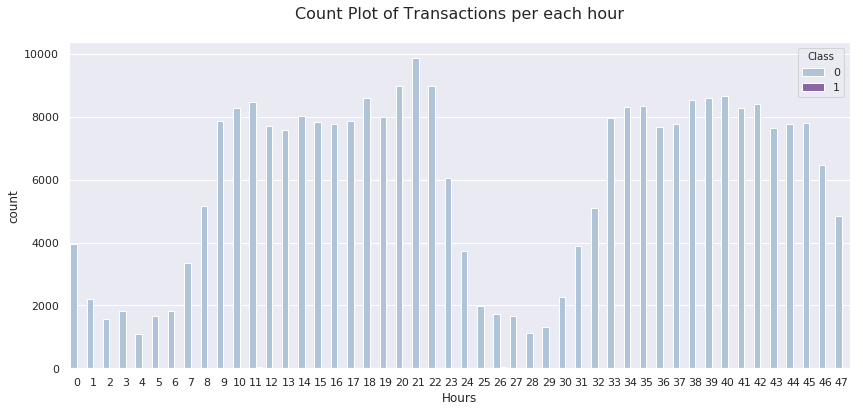

In [9]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
sns.countplot(x='Hours',data = datafr, hue = 'Class',palette='BuPu')
plt.title("Count Plot of Transactions per each hour\n", fontsize=16)
sns.set_context("paper", font_scale=1.4)
plt.show()

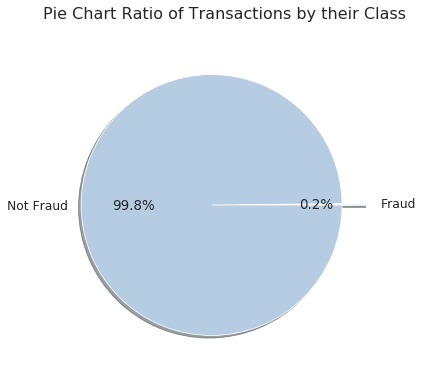

In [10]:
fraud =len(datafr[datafr['Class']==1])
notfraud = len(datafr[datafr['Class']==0])

# Data to plot
labels = 'Fraud','Not Fraud'
sizes = [fraud,notfraud]

# Plot
plt.figure(figsize=(7,6))
plt.pie(sizes, explode=(0.1, 0.1), labels=labels, colors=sns.color_palette("BuPu"),
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Pie Chart Ratio of Transactions by their Class\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)

### Create a new binned column based on Amount

In [11]:
bins = [0,100,1000,5000,10000,20000, 30000]
labels = [1,2,3,4,5,6]
datafr['binned'] = pd.cut(datafr['Amount'], bins=bins, labels=labels)
datafr.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Minutes,Hours,binned
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,2
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,2
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,2
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,1
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0,0,1
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0,0,1
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,0,0,1
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0,0,1
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,0,0,1


Text(0.5, 1.0, 'BoxPlot for Class 1: Fraudulent')

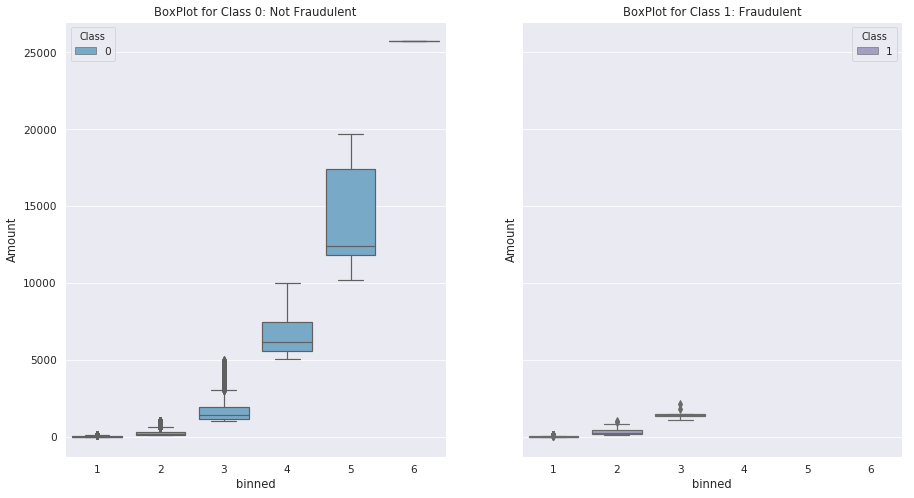

In [12]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
sns.boxplot(x="binned", y="Amount", hue="Class", data=datafr[datafr['Class']==0], palette='Blues', ax=axes[0])
axes[0].set_title('BoxPlot for {}'.format("Class 0: Not Fraudulent"))
sns.boxplot(x="binned", y="Amount", hue="Class", data=datafr[datafr['Class']==1], palette='Purples', ax=axes[1])
axes[1].set_title('BoxPlot for {}'.format("Class 1: Fraudulent"))

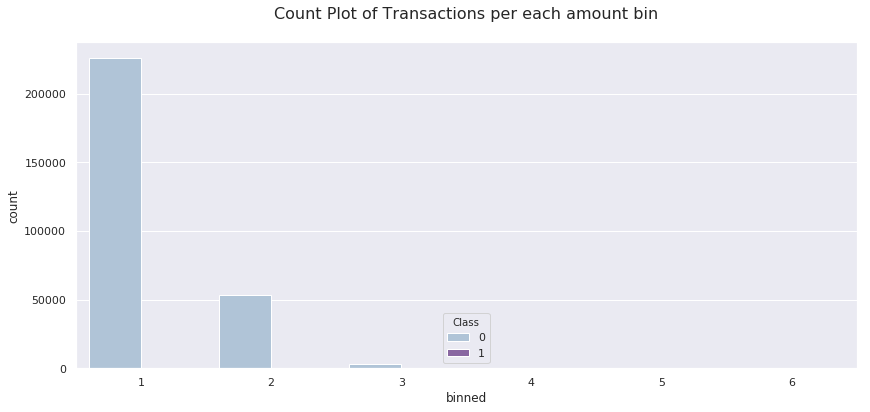

In [13]:
plt.figure(figsize=(14,6))
sns.set(style="darkgrid")
sns.countplot(x='binned',data = datafr, hue = 'Class',palette='BuPu')
plt.title("Count Plot of Transactions per each amount bin\n", fontsize=16)
sns.set_context("paper", font_scale=1.4)
plt.show()

**The dataset is highly imbalanced which could lead us to create an algorithm resulting in predicting only 1 type of class. Thus, we have to try different strategies as a solution to imbalance class problem.**
Here are the few techniques that can be used for such a problem:
1. Try Changing Performance Metric
2. Try Resampling Dataset
3. Try Generating Synthetic Samples
4. Try Different Algorithms

[Reference 1](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)
<br>
[Reference 2](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

# Understanding the Problem
### The metric trap
One of the major issues that novice users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.


In [14]:
y = datafr['Class']
X = datafr.drop(['Time','Class','binned'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))

Test Accuracy is 99.94%


**Again trying to run a predictive model on first 3 features "V1", "V2", "V3" we should notice a change in model's performance**

In [15]:
model = XGBClassifier()
model.fit(X_train[['V1','V2','V3']], y_train)

y_pred = model.predict(X_test[['V1','V2','V3']])
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))

Test Accuracy is 99.85%


The model accuracy hasn't differed by much suggesting that the achieved acccuracy is just an illusion which is caused due to imbalanced class dataset. Below we can actually see how the proportion of observations are actually predicted for each class using Confusion Matrix.

### Confusion matrix

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 1 entries were erroneously predicted as class 0.

Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.



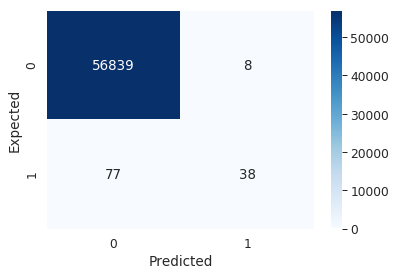

In [16]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(y_test,y_pred)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Change the Performance Metric
As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:
* Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
* Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
* Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
* F1: Score: the weighted average of precision and recall.

# Resampling Techniques
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).
![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

**Note: Always split the dataset into test and train sets BEFORE trying any resampling techniques!**

In [17]:
from sklearn.utils import resample
# Separate input features and target
Y = datafr.Class
X = datafr.drop(['Time','Class','binned'], axis=1)

# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2727)

# concatenate our training data back together
X = pd.concat([X_train, Y_train], axis=1)

**Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.**

### 1: Random over-sampling minority class
Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

In [18]:
# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=2727) # reproducible results

# combine majority and oversampled minority
oversampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
oversampled.Class.value_counts()

1    199032
0    199032
Name: Class, dtype: int64

After resampling we have an equal ratio of data points for each class! Let’s try our above XGBoost Classifier again with the balanced training data.

In [19]:
# trying xgboost again with the balanced dataset
y_train = oversampled.Class
X_train = oversampled.drop('Class', axis=1)

upsampled = XGBClassifier()
upsampled.fit(X_train, y_train)

# Predict on test
upsampled_pred = upsampled.predict(X_test)

# predict probabilities
probs = upsampled.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [20]:
# Checking accuracy
accuracy = accuracy_score(Y_test, upsampled_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))

Test Accuracy is 99.61%


In [21]:
# f1 score
f1_over = f1_score(Y_test, upsampled_pred)
print("F1 Score is {:.2f}%".format(f1_over))

F1 Score is 0.45%


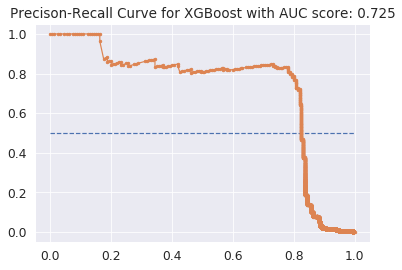

In [22]:
from sklearn.metrics import auc
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, probs)
# calculate precision-recall AUC
auc_over = auc(recall, precision)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.title("Precison-Recall Curve for XGBoost with AUC score: {:.3f}".format(auc_over))
# show the plot
plt.show()

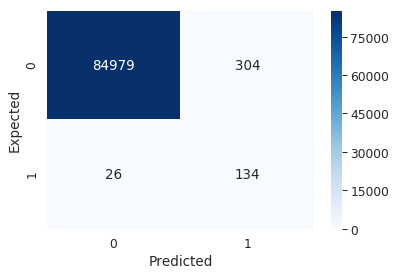

In [23]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,upsampled_pred)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### 2: Random under-sampling majority class
Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [24]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    332
0    332
Name: Class, dtype: int64

In [25]:
# trying xgboost again with the balanced dataset
y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = XGBClassifier()
undersampled.fit(X_train, y_train)

# Predict on test
undersampled_pred = undersampled.predict(X_test)
# predict probabilities
probs = undersampled.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [26]:
# Checking accuracy
accuracy = accuracy_score(Y_test, undersampled_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))

Test Accuracy is 96.67%


In [27]:
# f1 score
f1_under = f1_score(Y_test, undersampled_pred)
print("F1 Score is {:.2f}%".format(f1_under))

F1 Score is 0.09%


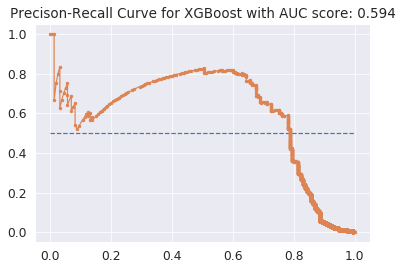

In [28]:
from sklearn.metrics import auc
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, probs)
# calculate precision-recall AUC
auc_under = auc(recall, precision)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.title("Precison-Recall Curve for XGBoost with AUC score: {:.3f}".format(auc_under))
# show the plot
plt.show()

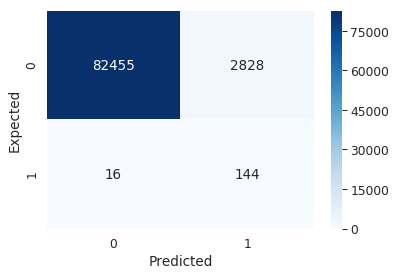

In [29]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,undersampled_pred)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# SMOTE
Synthetic Minority Over-sampling Technique has been designed to generate new samples that are coherent with the minor class distribution. The main idea is to consider the relationships that exist between samples and create new synthetic points along the segments connecting a group of neighbors. Below is the python code for implementing SMOTE.
![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

In [30]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
Y = datafr.Class
X = datafr.drop(['Time','Class','binned'], axis=1)

# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2727)

sm = SMOTE(random_state=2727, ratio=1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

Using TensorFlow backend.


**Restructure X_train & Y_train to execute XGBoost algorithm**

In [31]:
X_train = pd.DataFrame(data=X_train)
X_train.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Minutes',
       'Hours']
Y_train = pd.Series(Y_train)

In [32]:
smote = XGBClassifier()
smote.fit(X_train, Y_train)

# Predict on test
smote_pred = smote.predict(X_test)
# predict probabilities
probs = smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [33]:
# Checking accuracy
accuracy = accuracy_score(Y_test, smote_pred)
print("Test Accuracy is {:.2f}%".format(accuracy * 100.0))

Test Accuracy is 99.54%


In [34]:
# f1 score
f1_smote = f1_score(Y_test, smote_pred)
print("F1 Score is {:.2f}%".format(f1_smote))

F1 Score is 0.41%


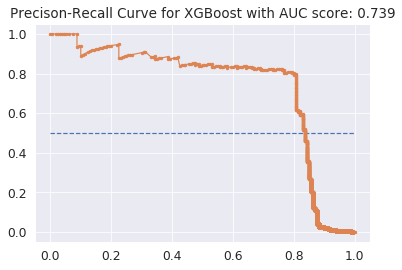

In [35]:
from sklearn.metrics import auc
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, probs)
# calculate precision-recall AUC
auc_smote = auc(recall, precision)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.title("Precison-Recall Curve for XGBoost with AUC score: {:.3f}".format(auc_smote))
# show the plot
plt.show()

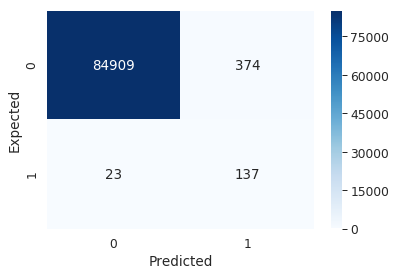

In [36]:
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,smote_pred)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Conclusion
So far we tried using various performance metrics like Confusion matrix, F1-Score, Precision-Recall curve for different techniques like over-sampling of minority class, under-sampling of majority class and SMOTE (Synthetic Minority Over-Sampling Technique). Based on our evaluation metrics we found that undersampling of majority class resulted in poor poerformance when compared to Over-Sampling techniques and SMOTE. It's still hard to pick a winner here. The algorithm we used in all the scenario was XGBoost.
<br><br>
**Further Improvements: To further improve the model, below options can be considered:**
* Try using Deep Learning algorithms like CNN, or stacked or hybrid machine learning algorithms
* Try using variants of SMOTE.
* Tuning of hyper-parameters(learning rate, max-depth, etc.) of the above models.

Text(0.5, 1.0, 'Performance based on AUC Score')

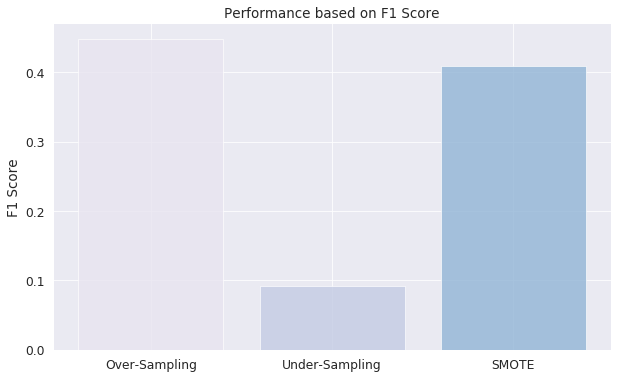

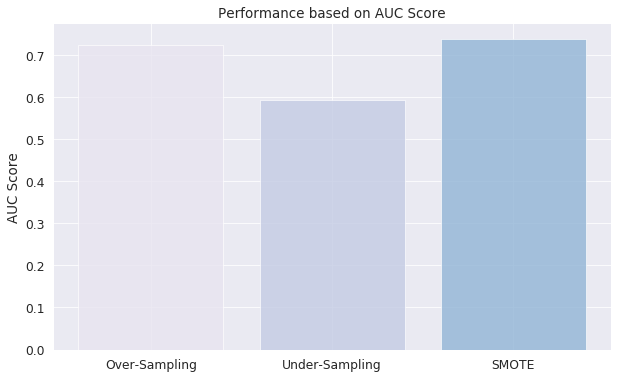

In [37]:
# F1 Score list for all models
f1 = [f1_over, f1_under, f1_smote]
# AUC Score list for all models
auc = [auc_over, auc_under, auc_smote]
# Name List of ML Models used
models = ['Over-Sampling', 'Under-Sampling', 'SMOTE']
y_pos = np.arange(len(models)) #Position = 0,1,2

# Plot F1 Score
plt.figure(figsize=(10, 6))  
plt.bar(y_pos, f1, align='center', alpha=0.8, color=sns.color_palette("PuBu"))
plt.xticks(y_pos, models)
plt.ylabel('F1 Score')
plt.title('Performance based on F1 Score')

# Plot AUC Score
plt.figure(figsize=(10, 6))  
plt.bar(y_pos, auc, align='center', alpha=0.8, color=sns.color_palette("PuBu"))
plt.xticks(y_pos, models)
plt.ylabel('AUC Score')
plt.title('Performance based on AUC Score')